---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    
    # Your code here
    df = pd.read_csv('readonly/fraud_data.csv')
    a=np.asarray(np.where(df['Class']==1))
    b=np.asarray(np.where(df['Class']==0))
    return float(a.size/(a.size+b.size)) # Return your answer
answer_one()


0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('readonly/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(np.where(y_test==1))

(array([  44,   45,  155,  251,  257,  341,  360,  501,  523,  620,  859,
        935,  945, 1028, 1091, 1282, 1478, 1555, 1573, 1578, 1658, 1737,
       1801, 1815, 1829, 1890, 2008, 2092, 2112, 2117, 2190, 2318, 2381,
       2407, 2422, 2736, 2796, 2965, 2993, 3019, 3069, 3073, 3199, 3226,
       3227, 3278, 3331, 3512, 3624, 3674, 3706, 3926, 4036, 4048, 4096,
       4205, 4251, 4303, 4378, 4403, 4486, 4545, 4572, 4694, 4723, 4765,
       4768, 4786, 4856, 4932, 4961, 5046, 5099, 5110, 5143, 5161, 5359,
       5381, 5382, 5402]),)


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_pred = dummy_majority.predict(X_test)

    from sklearn.metrics import accuracy_score
#    from sklearn.metrics import precision_score
    return accuracy_score(y_test, y_pred),recall_score(y_test, y_pred) # Return your answer
answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    from sklearn.metrics import accuracy_score
    svc =SVC()
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)

    return accuracy_score(y_test, y_pred),recall_score(y_test, y_pred), precision_score(y_test, y_pred) # Return your answer
answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svc =SVC(C=1e9,gamma=1e-07)
    y_scores = svc.fit(X_train, y_train).decision_function(X_test)
    from sklearn.metrics import precision_recall_curve

    for i in enumerate(y_scores):
        if i[1]>-220:
            y_scores[i[0]]=1
        else:
            y_scores[i[0]]=0
  
    
    confusion = confusion_matrix(y_test, y_scores)

    return confusion# Return your answer
                    
#v=answer_four()
#print(v)
#n=0
#for i in v:
#    if i[1]>=220:
#        print(i[1])
#print(v[np.where(v[0]==1)])
                        

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [7]:
def answer_five():
        
    # Your code here
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve

    lr = LogisticRegression().fit(X_train, y_train)
    y_scores_lr = lr.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    recall=0.8
        
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc

    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    return tuple((0.8,0.8)) # Return your answer
answer_five()


(0.8, 0.8)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [30]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    clf= LogisticRegression()
    grid_values = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}

    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring='recall')
    grid_clf_acc.fit(X_train, y_train)
    means = grid_clf_acc.cv_results_['mean_test_score'].reshape(5,2)

    return means# Return your answer

#t=answer_six()

<IPython.core.display.Javascript object>


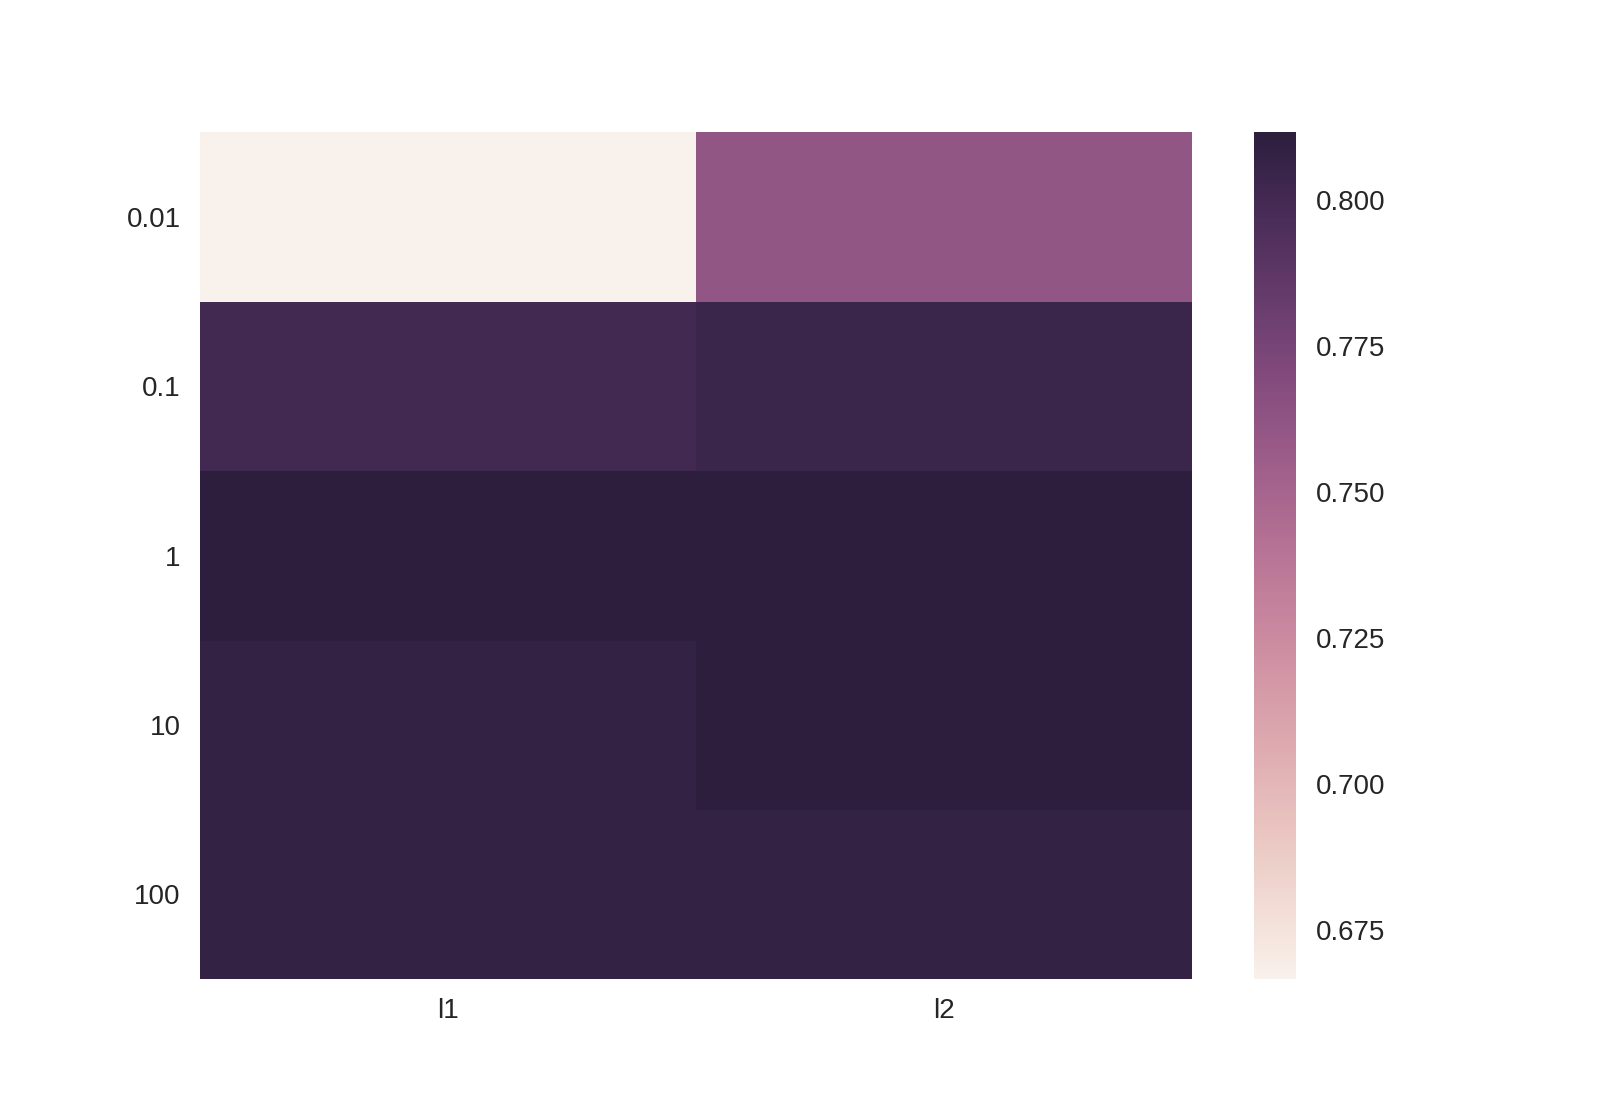

In [31]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())